**STA 380 Part 2 Exam**

Group Members : Sankalp Kulkarni, Anmol Agarwal, Srishty Mishra, Aishwarya Parida

# Clustering and Dimensionality reduction

The data in wine.csv contains information on 11 chemical properties of 6500 different bottles of vinho verde wine from northern Portugal. In addition, two other variables about each wine are recorded:

whether the wine is red or white
the quality of the wine, as judged on a 1-10 scale by a panel of certified wine snobs.
Run PCA, tSNE, and any clustering algorithm of your choice on the 11 chemical properties (or suitable transformations thereof) and summarize your results. Which dimensionality reduction technique makes the most sense to you for this data? Convince yourself (and me) that your chosen approach is easily capable of distinguishing the reds from the whites, using only the "unsupervised" information contained in the data on chemical properties. Does your unsupervised technique also seem capable of distinguishing the higher from the lower quality wines? Present appropriate numerical and/or visual evidence to support your conclusions.

To clarify: I'm not asking you to run a supervised learning algorithms. Rather, I'm asking you to see whether the differences in the labels (red/white and quality score) emerge naturally from applying an unsupervised technique to the chemical properties. This should be straightforward to assess using plots.

In [2]:
import pandas as pd
import numpy as np

In [3]:
#Reading the wine data fron the given file:

Wine_data = pd.read_csv("wine.csv")

In [4]:
Wine_data.head(5)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [5]:
Wine_data.shape

(6497, 13)

In [75]:
Wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed.acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile.acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric.acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual.sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free.sulfur.dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total.sulfur.dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

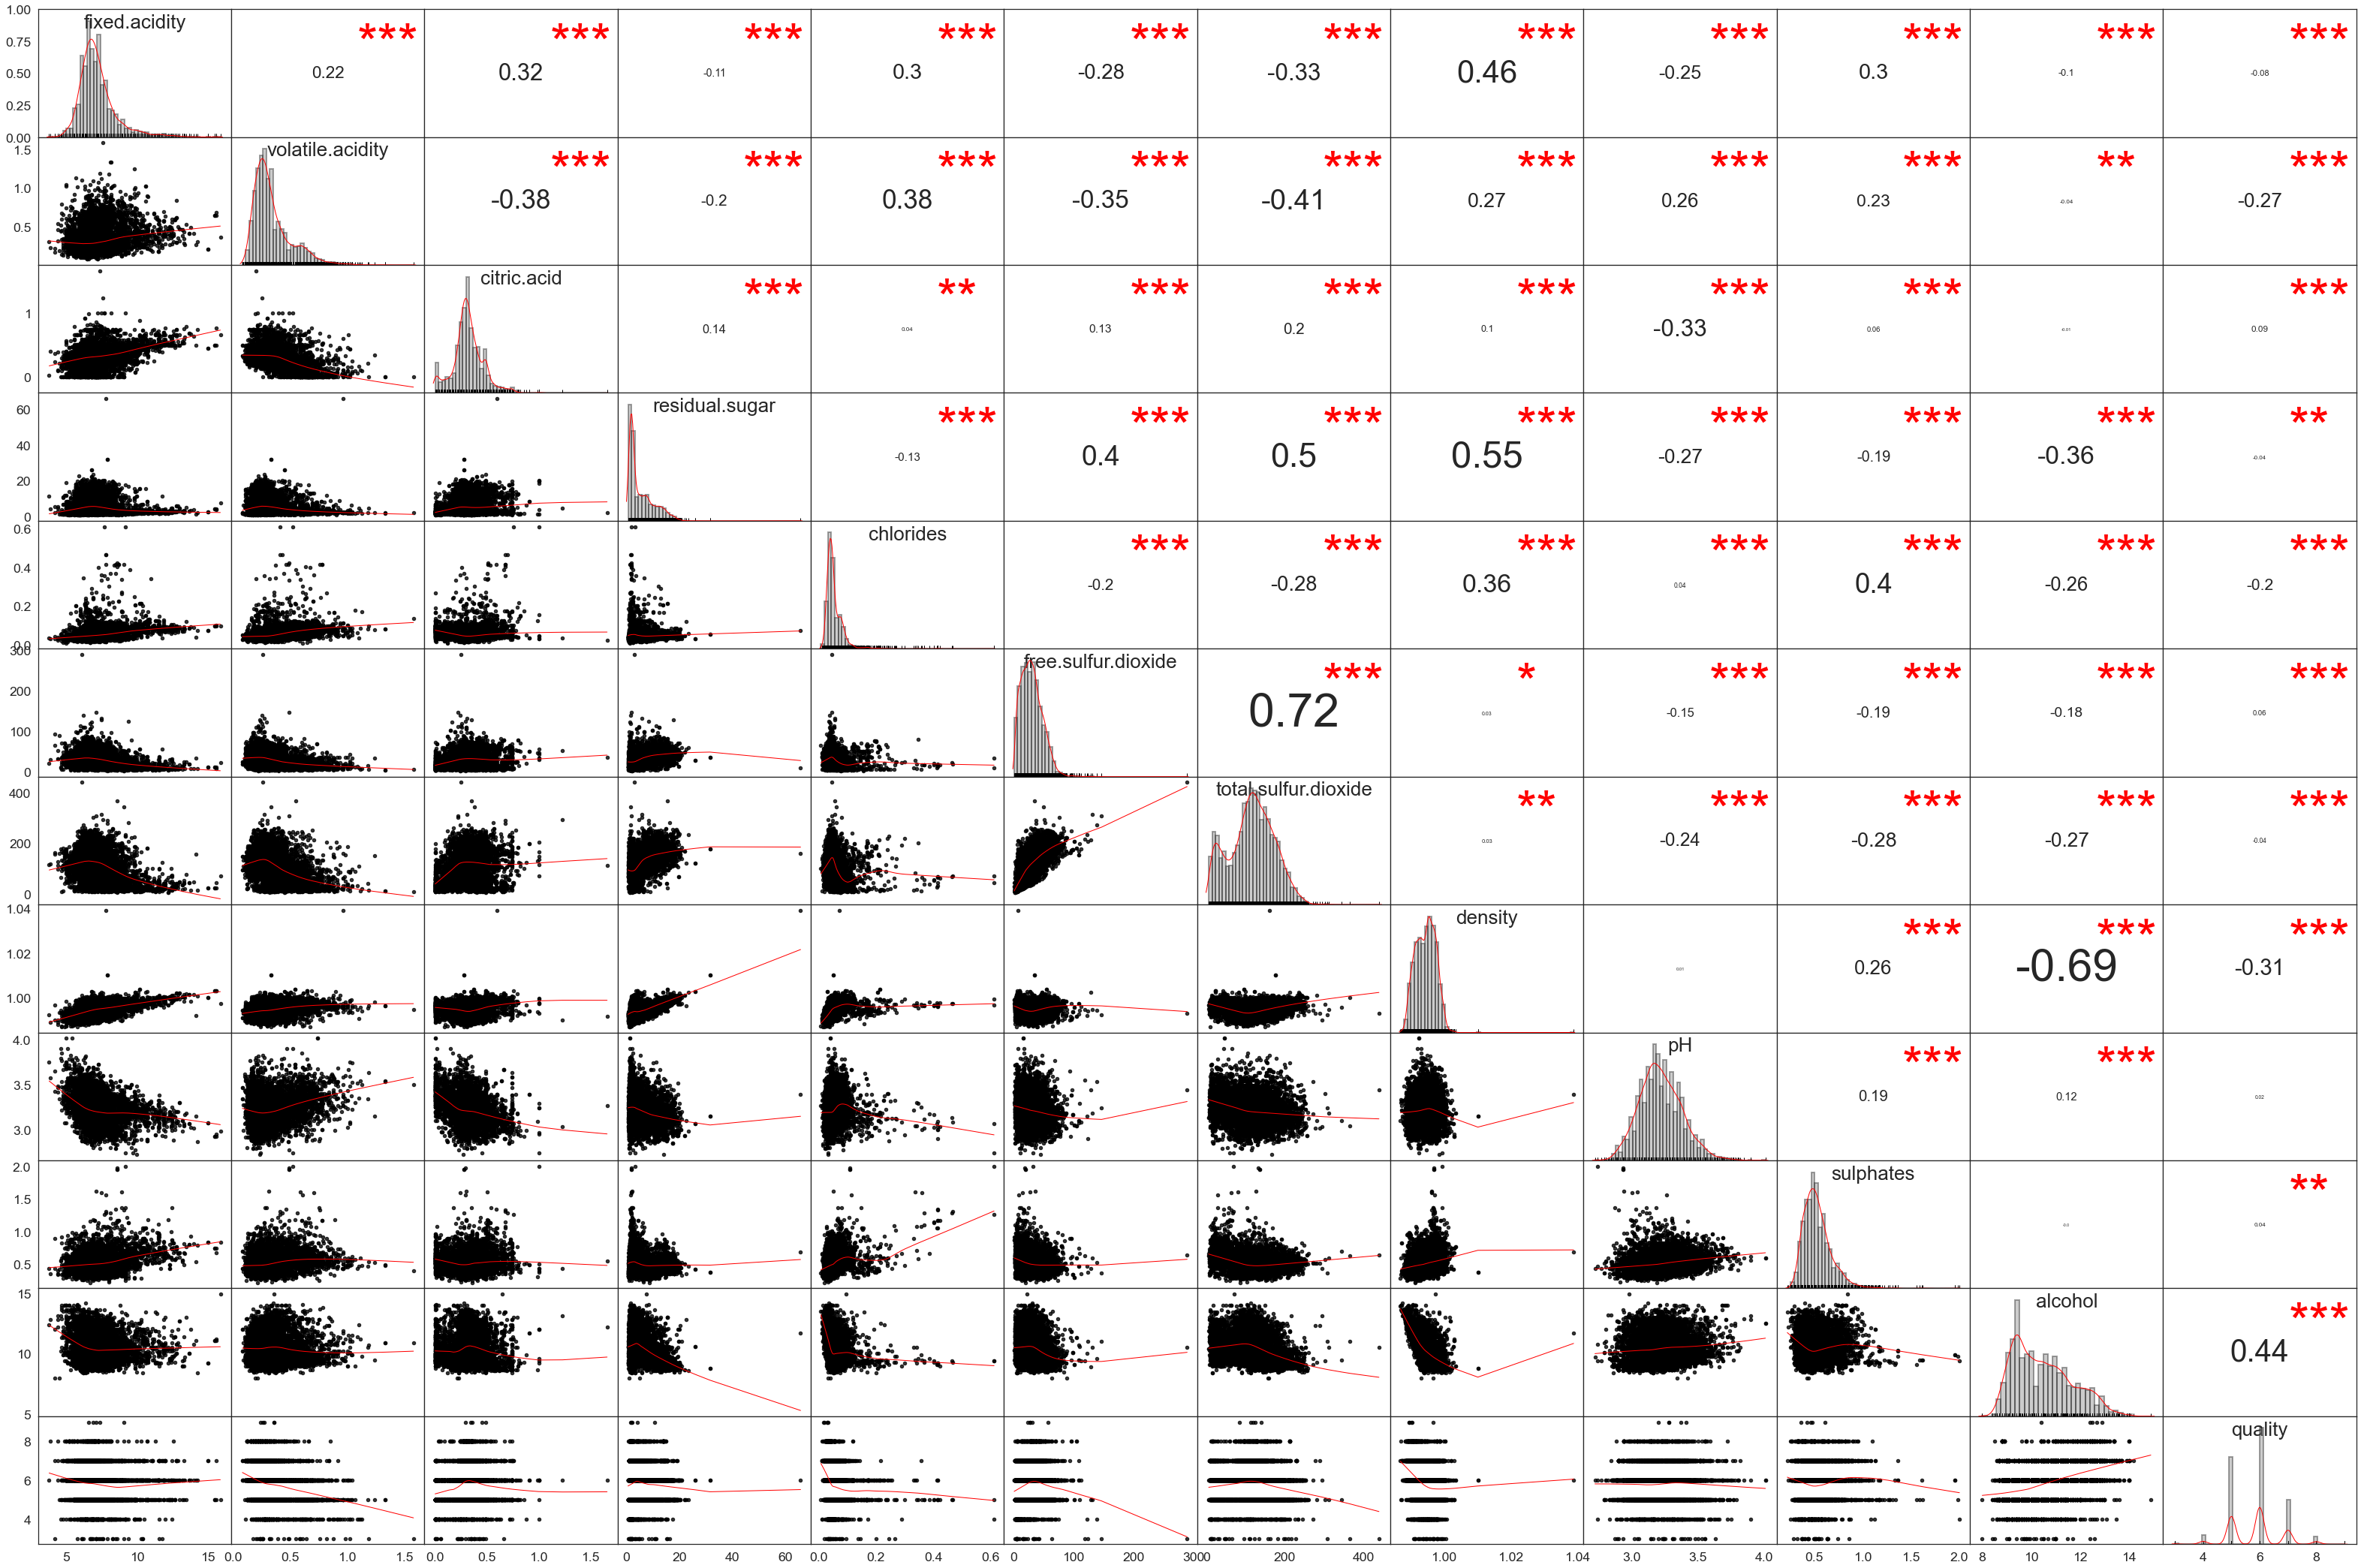

In [81]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    font_size = abs(corr_r) * 80 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

def corrfunc(x, y, **kws):
    r, p = stats.pearsonr(x, y)
    p_stars = ''
    if p <= 0.05:
        p_stars = '*'
    if p <= 0.01:
        p_stars = '**'
    if p <= 0.001:
        p_stars = '***'
    ax = plt.gca()
    ax.annotate(p_stars, xy=(0.65, 0.6), xycoords=ax.transAxes,
                color='red', fontsize=70)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(Wine_data, aspect=1.5, diag_sharey=False, despine=False)
g.map_lower(sns.regplot, lowess=True, ci=False,
            line_kws={'color': 'red', 'lw': 1},
            scatter_kws={'color': 'black', 's': 20})
g.map_diag(sns.distplot, color='black',
           kde_kws={'color': 'red', 'cut': 0.7, 'lw': 1},
           hist_kws={'histtype': 'bar', 'lw': 2,
                     'edgecolor': 'k', 'facecolor':'grey'})
g.map_diag(sns.rugplot, color='black')
g.map_upper(corrdot)
g.map_upper(corrfunc)
g.fig.subplots_adjust(wspace=0, hspace=0)

# Remove axis labels
for ax in g.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')

# Add titles to the diagonal axes/subplots
for ax, col in zip(np.diag(g.axes), Wine_data.columns):
    ax.set_title(col, y=0.82, fontsize=26)

The graph above shows the distribution on left side and statistical significance on the right side where <br>
3 stars - significance level of 0.001 <br>
2 stars - significance level of 0.01  <br>
1 star  - significance level of 0.05

In [88]:
#Check for the covariance - if there is a high covariance between variables then it is a desirable for PCAs

# Calculate the covariance between each pair of columns using numpy
covariance_matrix = np.cov(Wine_data[columns_to_visualize], rowvar=False)

# Create a DataFrame to display the covariance matrix
covariance_df = pd.DataFrame(covariance_matrix, columns=columns_to_visualize, index=columns_to_visualize)

# Display the covariance DataFrame
print("Covariance Matrix:")
print(covariance_df)

Covariance Matrix:
                      fixed.acidity  volatile.acidity  citric.acid  \
fixed.acidity              1.680740          0.046745     0.061122   
volatile.acidity           0.046745          0.027105    -0.009043   
citric.acid                0.061122         -0.009043     0.021117   
residual.sugar            -0.690720         -0.153537     0.098490   
chlorides                  0.013544          0.002175     0.000199   
free.sulfur.dioxide       -6.506003         -1.030242     0.343372   
total.sulfur.dioxide     -24.112030         -3.856933     1.603646   
density                    0.001784          0.000134     0.000042   
pH                        -0.052675          0.006921    -0.007706   
sulphates                  0.057792          0.005536     0.001215   
alcohol                   -0.147594         -0.007391    -0.001819   

                      residual.sugar  chlorides  free.sulfur.dioxide  \
fixed.acidity              -0.690720   0.013544            -6.506003

In [93]:
#Running the PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Extract the selected columns
wine_selected = Wine_data.select_dtypes(include='number').drop(columns=["quality"])

# Standardize the data (center and scale)
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_selected)

# Perform PCA
n_components = wine_selected.shape[1]  # Number of components
pca = PCA(n_components=n_components)
pc = pca.fit_transform(wine_scaled)

#Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a summary DataFrame
summary_data = {'Principal Component': range(1, n_components + 1),
                'Explained Variance Ratio': explained_variance_ratio,
                'Cumulative Variance Ratio': np.cumsum(explained_variance_ratio)}

summary_df = pd.DataFrame(summary_data)

print(summary_df)

    Principal Component  Explained Variance Ratio  Cumulative Variance Ratio
0                     1                  0.275443                   0.275443
1                     2                  0.226711                   0.502154
2                     3                  0.141486                   0.643640
3                     4                  0.088232                   0.731872
4                     5                  0.065443                   0.797315
5                     6                  0.055210                   0.852525
6                     7                  0.047560                   0.900085
7                     8                  0.045592                   0.945677
8                     9                  0.030639                   0.976316
9                    10                  0.020700                   0.997015
10                   11                  0.002985                   1.000000


In [92]:
pca

PCA(n_components=11)

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.205996  0.416523 -2.722237 -0.796778  0.202877 -0.227363 -0.325554   
1 -3.039051  1.107462 -2.046952 -0.770225 -1.322655  1.655121  0.059559   
2 -3.071893  0.878964 -1.742580 -0.802257 -0.762112  0.848374  0.167670   

        PC8       PC9      PC10  ...  residual.sugar  chlorides  \
0 -0.567278  0.071229 -0.108046  ...             1.9      0.076   
1 -0.514603 -0.429129 -0.268149  ...             2.6      0.098   
2 -0.420952 -0.271032 -0.086832  ...             2.3      0.092   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  color  
0      9.4        5    red  
1      9.8        5    red  
2      9.8        5    red  

[3 rows x 24 col

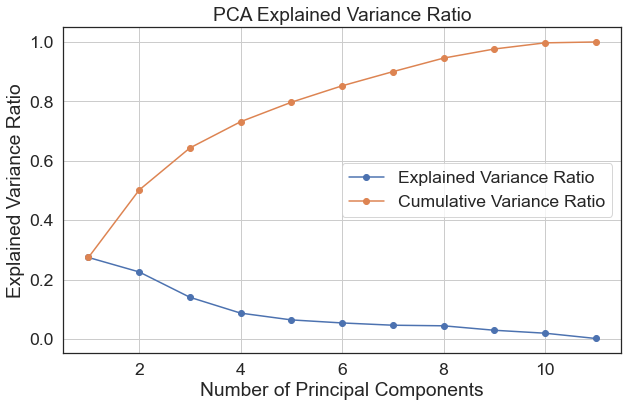

In [94]:
# Create a data frame containing the PCA components and the original wine data
wine_master = pd.concat([pd.DataFrame(pc, columns=[f"PC{i+1}" for i in range(pc.shape[1])]), Wine_data], axis=1)

# Display the first 3 rows of wine_master
print(wine_master.iloc[0:3, :])

# Plot the PCA explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), explained_variance_ratio, marker='o')
plt.plot(range(1, n_components + 1), np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')
plt.legend(['Explained Variance Ratio', 'Cumulative Variance Ratio'])
plt.grid()
plt.show()

The first 2 conponenets explain ~50% variation and sicne we are dealing with 2D space , we will try to plot them against each other and check if they can help us identify color and quality of the wine.

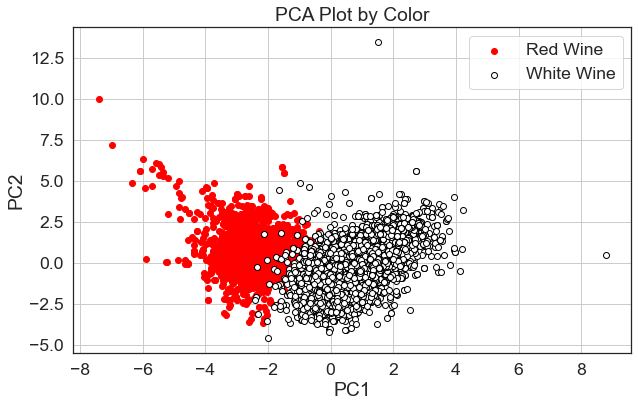

In [96]:
#Checking if colors are/can be easily identified

plt.figure(figsize=(10, 6))

# Plot red points
red_points = wine_master[wine_master['color'] == 'red']
plt.scatter(red_points['PC1'], red_points['PC2'], c='red', label='Red Wine')

# Plot white points
white_points = wine_master[wine_master['color'] == 'white']
plt.scatter(white_points['PC1'], white_points['PC2'], c='white', edgecolors='black', marker='o', label='White Wine')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot by Color')
plt.legend()
plt.grid() 

plt.show()

**Verdict** : Color is clearly visible as we are able to distinguish between red and white color of wine.

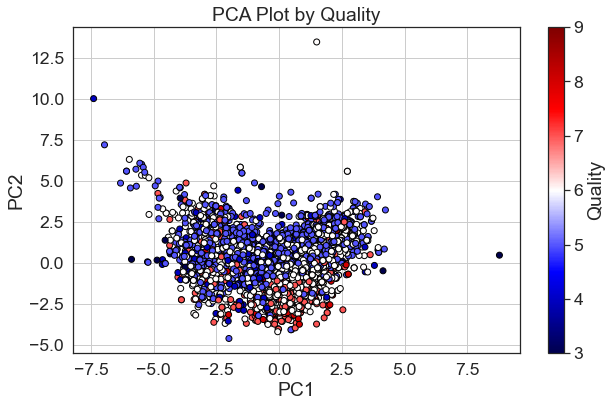

In [98]:
plt.figure(figsize=(10, 6))

# Create a scatter plot colored by 'quality'
plt.scatter(wine_master['PC1'], wine_master['PC2'], c=wine_master['quality'], cmap='seismic', edgecolors='black')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot by Quality')
plt.colorbar(label='Quality')
plt.grid()  # You can remove this line if you don't want gridlines

plt.show()

**Verdict** : Quality differenciation is not that very clear as it is evident from the above chart

**Conclusions about PCA**
<br>1. Given PC1 and PC2,we are able to identify wines by their colors <br>2. However, we are unable to predict their qualities wit just 2 PCs

**t-SNE**

In [99]:
from sklearn.manifold import TSNE

# Extract the selected columns
wine_selected = Wine_data.select_dtypes(include='number').drop(columns=["quality"])

# Standardize the data (center and scale)
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_selected)

# Perform t-SNE
n_components = 2  # Number of components for t-SNE
tsne = TSNE(n_components=n_components, random_state=42)
tsne_result = tsne.fit_transform(wine_scaled)

# Create a DataFrame with t-SNE components
tsne_df = pd.DataFrame(tsne_result, columns=["t-SNE1", "t-SNE2"])

# Concatenate t-SNE components with original data
wine_tsne = pd.concat([tsne_df, Wine_data], axis=1)

# Display the first few rows of the t-SNE DataFrame
print("t-SNE Result:")
print(wine_tsne.head())


t-SNE Result:
      t-SNE1     t-SNE2  fixed.acidity  volatile.acidity  citric.acid  \
0   1.669983  81.202644            7.4              0.70         0.00   
1  16.025961  80.133057            7.8              0.88         0.00   
2  16.326937  79.474648            7.8              0.76         0.04   
3  56.338665  58.444519           11.2              0.28         0.56   
4   1.669416  81.202538            7.4              0.70         0.00   

   residual.sugar  chlorides  free.sulfur.dioxide  total.sulfur.dioxide  \
0             1.9      0.076                 11.0                  34.0   
1             2.6      0.098                 25.0                  67.0   
2             2.3      0.092                 15.0                  54.0   
3             1.9      0.075                 17.0                  60.0   
4             1.9      0.076                 11.0                  34.0   

   density    pH  sulphates  alcohol  quality color  
0   0.9978  3.51       0.56      9.4      

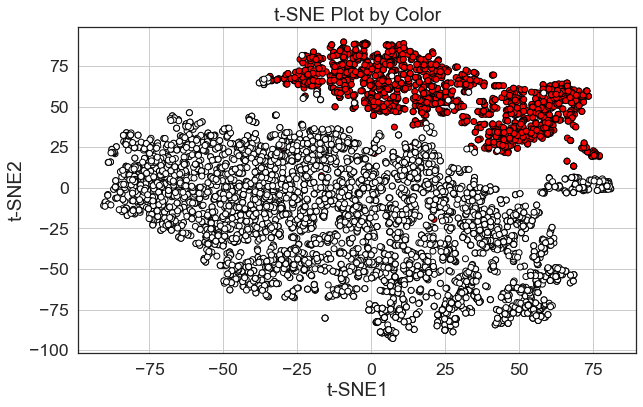

In [100]:
# Plot t-SNE visualization by color
plt.figure(figsize=(10, 6))
plt.scatter(wine_tsne['t-SNE1'], wine_tsne['t-SNE2'], c=wine_tsne['color'], edgecolors='black')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('t-SNE Plot by Color')
plt.grid()
plt.show()

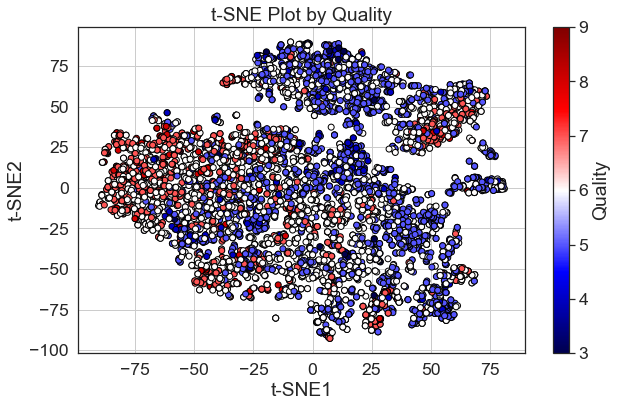

In [101]:
# Plot t-SNE visualization by quality
plt.figure(figsize=(10, 6))
plt.scatter(wine_tsne['t-SNE1'], wine_tsne['t-SNE2'], c=wine_tsne['quality'], cmap='seismic', edgecolors='black')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('t-SNE Plot by Quality')
plt.colorbar(label='Quality')
plt.grid()
plt.show()

**Conclusions about t-SNE**
<br>1. t-SNE is also helpful in identifying wines by the color. <br>2. Quality differenciation is still ambigeous using t SNE. <br>3. In conlcusion, PCA and t SNE are proving to be useful when we want to differentiate the wine by the color but both the techniques are failing to provide clear distinction abut the quality of the wine.

**K-Means Clustering**

In [120]:
Wine_data.head(5)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [121]:
#Standardizing variables first
from sklearn.preprocessing import StandardScaler

# Extract selected columns
X = Wine_data.drop(columns="color")

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the data using the scaler
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame with original column names and index
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print(X_scaled_df.head())


   fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0       0.142473          2.188833    -2.192833       -0.744778   0.569958   
1       0.451036          3.282235    -2.192833       -0.597640   1.197975   
2       0.451036          2.553300    -1.917553       -0.660699   1.026697   
3       3.073817         -0.362438     1.661085       -0.744778   0.541412   
4       0.142473          2.188833    -2.192833       -0.744778   0.569958   

   free.sulfur.dioxide  total.sulfur.dioxide   density        pH  sulphates  \
0            -1.100140             -1.446359  1.034993  1.813090   0.193097   
1            -0.311320             -0.862469  0.701486 -0.115073   0.999579   
2            -0.874763             -1.092486  0.768188  0.258120   0.797958   
3            -0.762074             -0.986324  1.101694 -0.363868   0.327510   
4            -1.100140             -1.446359  1.034993  1.813090   0.193097   

    alcohol   quality  
0 -0.915464 -0.937230  
1 -0.580

Mean:
fixed.acidity           1.007471e-15
volatile.acidity        1.002225e-15
citric.acid            -1.753083e-16
residual.sugar         -1.693547e-15
chlorides               2.863647e-16
free.sulfur.dioxide     1.009232e-15
total.sulfur.dioxide   -9.658103e-16
density                -4.469840e-15
pH                      3.086803e-15
sulphates               3.102883e-16
alcohol                 1.538147e-15
quality                 6.444958e-16
dtype: float64

Standard Deviation:
fixed.acidity           1.000077
volatile.acidity        1.000077
citric.acid             1.000077
residual.sugar          1.000077
chlorides               1.000077
free.sulfur.dioxide     1.000077
total.sulfur.dioxide    1.000077
density                 1.000077
pH                      1.000077
sulphates               1.000077
alcohol                 1.000077
quality                 1.000077
dtype: float64


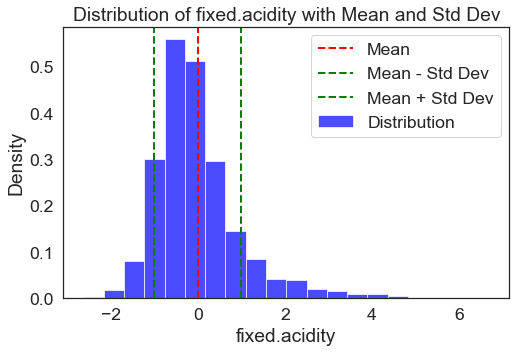

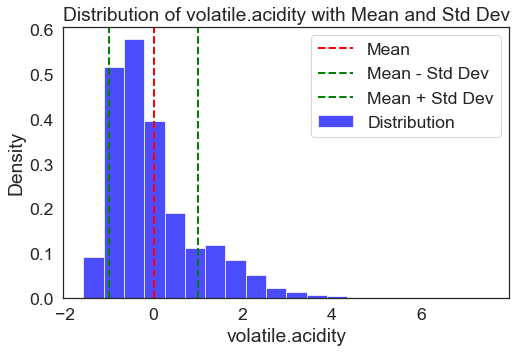

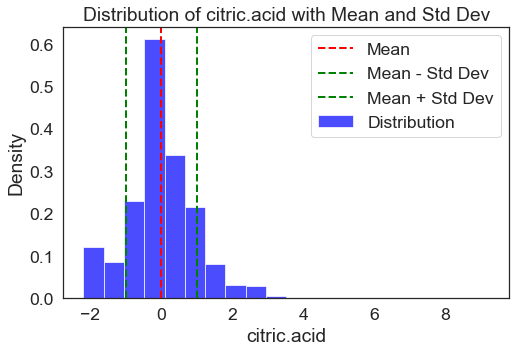

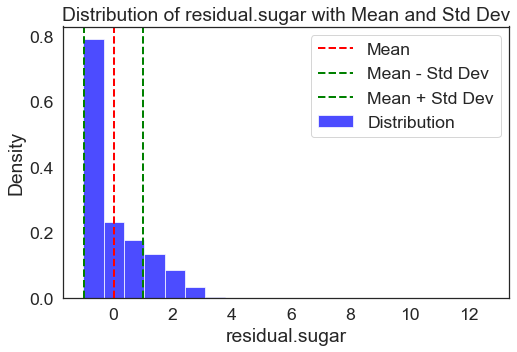

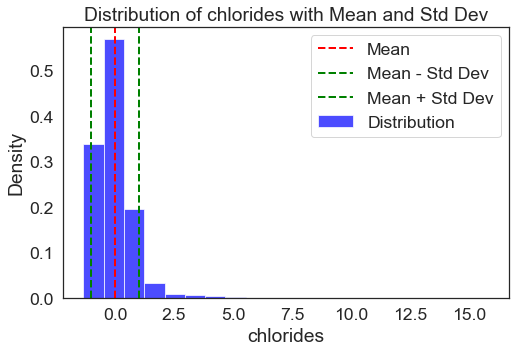

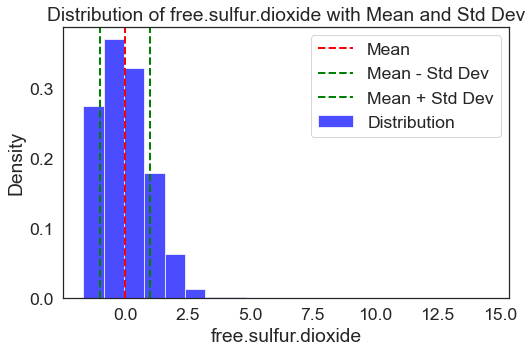

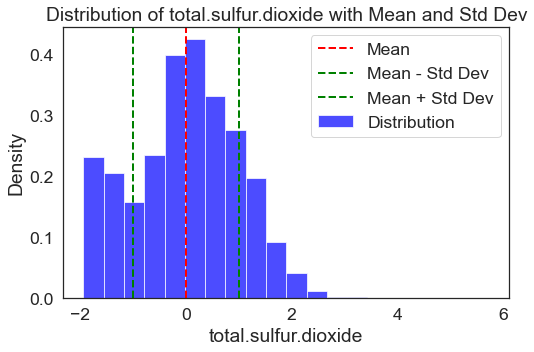

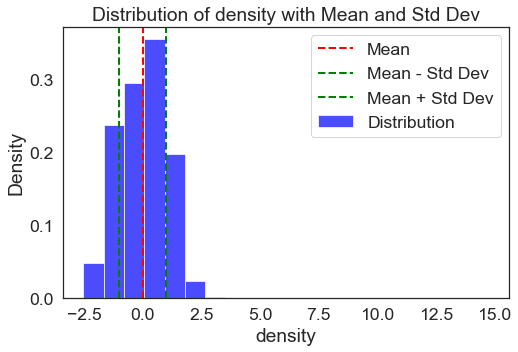

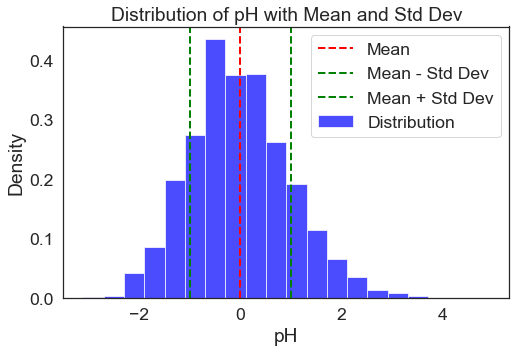

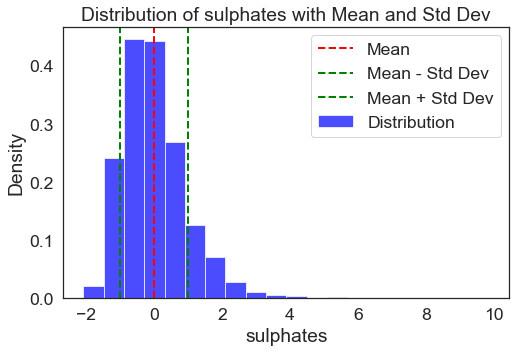

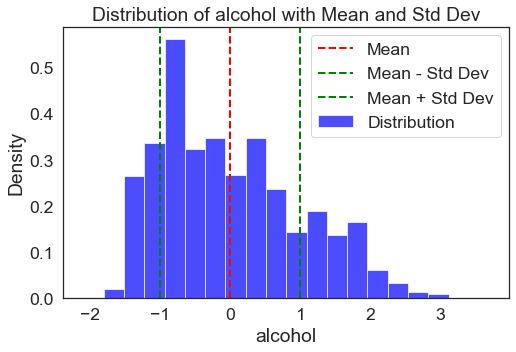

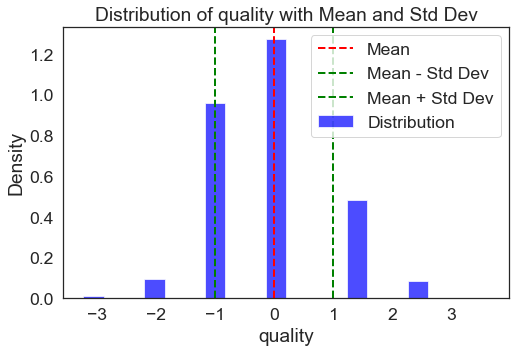

In [123]:
#Understanding the centre and spread of data

# Compute the mean and standard deviation
mu = X_scaled_df.mean()
sigma = X_scaled_df.std()

print("Mean:")
print(mu)

print("\nStandard Deviation:")
print(sigma)

import matplotlib.pyplot as plt

# Plot the distribution of each column along with mean and standard deviation
for column in X_scaled_df.columns:
    plt.figure(figsize=(8, 5))

    # Plot the histogram of the column
    plt.hist(X_scaled_df[column], bins=20, density=True, alpha=0.7, color='blue', label='Distribution')

    # Plot the mean and standard deviation
    plt.axvline(mu[column], color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(mu[column] - sigma[column], color='green', linestyle='dashed', linewidth=2, label='Mean - Std Dev')
    plt.axvline(mu[column] + sigma[column], color='green', linestyle='dashed', linewidth=2, label='Mean + Std Dev')

    plt.title(f'Distribution of {column} with Mean and Std Dev')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


**Wine Color**

We will check with 2 clusters to begin with and if we can distinguish between wines just by their colors.

In [124]:
from sklearn.cluster import KMeans

# Create a KMeans object with the specified number of clusters and n_init (nstart) value
num_clusters = 2 #Since we have only 2 colors
n_init = 25

kmeans = KMeans(n_clusters=num_clusters, n_init=n_init, random_state=0)

# Fit the KMeans model to the data
kmeans.fit(X_scaled_df)

# Get the cluster assignments for each data point
cluster_labels = kmeans.labels_

print("Cluster Labels:")
print(cluster_labels)

Cluster Labels:
[0 0 0 ... 1 1 1]


In [127]:
# Create a DataFrame with the cluster labels
clust_data = pd.DataFrame(cluster_labels, columns=['cluster'])

# Rename the column to 'Cluster'
clust_data.rename(columns={'cluster': 'Cluster'}, inplace=True)

# Convert the 'Cluster' column to numeric
clust_data['Cluster'] = pd.to_numeric(clust_data['Cluster'])

# Add the 'cluster' column to the 'wine' DataFrame
Wine_data['cluster'] = clust_data['Cluster']

# Create a cross-tabulation table (similar to R's table function)
wine_clust_table = pd.crosstab(Wine_data['cluster'], Wine_data['color'], rownames=['Cluster'], colnames=['Color'])

print(wine_clust_table)



Color     red  white
Cluster             
0        1574     94
1          25   4804


In [130]:
# Calculate cluster accuracy
cluster_accuracy = round(100 * (wine_clust_table.iloc[0, 0] + wine_clust_table.iloc[1, 1]) / len(Wine_data))

print("Cluster Accuracy:", cluster_accuracy,"%")


Cluster Accuracy: 98 %


**Comments on results**
<br>1. We are able to predict the color of the wine with 98% accuracy as per the confusion matrix above. 
<br>2. We will plot a graph to visualize the same. As an example, we can show it for 2 of the variables/checmical propertiese from the given pool of variables.

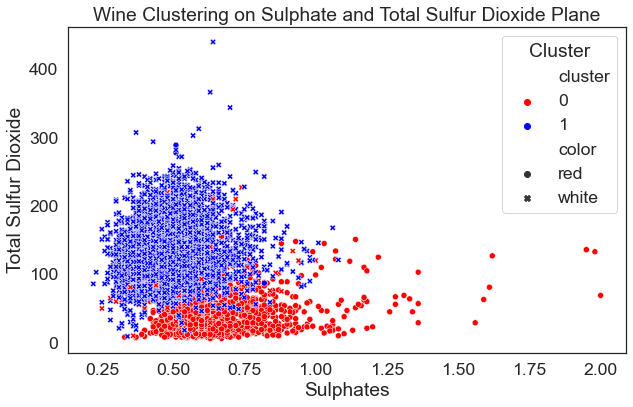

In [135]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
cluster_palette = {0: 'red', 1: 'blue'}
sns.scatterplot(data=Wine_data, x='sulphates', y='total.sulfur.dioxide', hue='cluster', style='color', palette=cluster_palette)
plt.title('Wine Clustering on Sulphate and Total Sulfur Dioxide Plane')
plt.xlabel('Sulphates')
plt.ylabel('Total Sulfur Dioxide')
plt.legend(title='Cluster')
plt.show()

We can clearly distinguish between the different colors of the wine as shown above

**Wine Quality** 

*Trying with K=7*

Since we have the quality ranging between 3 to 9, we are making an attempt to check if we can identify 7 different clusters - one for each quality level

In [136]:
from sklearn.cluster import KMeans

# Create a KMeans object with 7 clusters and n_init (nstart) value of 20
num_clusters = 7
n_init = 20

kmeans_7 = KMeans(n_clusters=num_clusters, n_init=n_init, random_state=0)

# Fit the KMeans model to the data
kmeans_7.fit(X_scaled_df)

# Get the cluster assignments for each data point
cluster_labels_7 = kmeans_7.labels_

print("Cluster Labels:")
print(cluster_labels_7)


Cluster Labels:
[3 3 3 ... 0 4 4]


Cluster 1 Center (Original Scale):
fixed.acidity           0.036637
volatile.acidity       -0.381743
citric.acid             0.113463
residual.sugar         -0.366711
chlorides              -0.286967
free.sulfur.dioxide    -0.455781
total.sulfur.dioxide   -0.026139
density                -0.465908
pH                     -0.649464
sulphates              -0.490711
alcohol                -0.116607
quality                -0.577688
dtype: float64



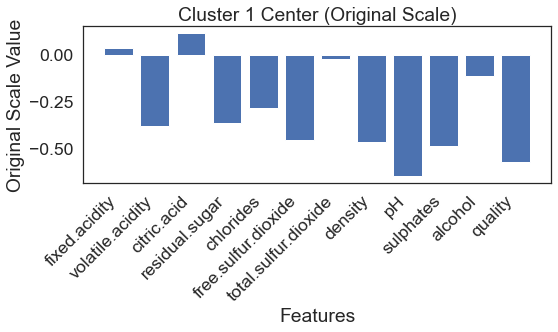

Cluster 2 Center (Original Scale):
fixed.acidity          -0.557613
volatile.acidity       -0.541824
citric.acid            -0.106091
residual.sugar         -0.239994
chlorides              -0.262583
free.sulfur.dioxide     0.438611
total.sulfur.dioxide    0.594741
density                -0.275169
pH                      0.727311
sulphates               0.022224
alcohol                -0.154855
quality                 0.109481
dtype: float64



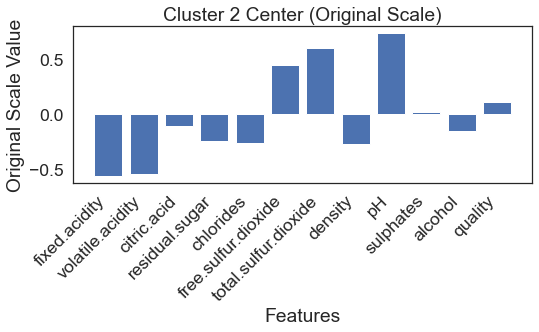

Cluster 3 Center (Original Scale):
fixed.acidity           2.100095
volatile.acidity        0.371177
citric.acid             1.004116
residual.sugar         -0.583539
chlorides               0.744879
free.sulfur.dioxide    -0.934282
total.sulfur.dioxide   -1.340665
density                 0.947252
pH                     -0.012087
sulphates               1.304597
alcohol                 0.174827
quality                 0.160704
dtype: float64



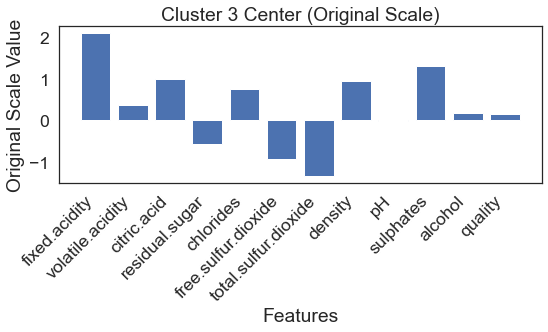

Cluster 4 Center (Original Scale):
fixed.acidity           0.116662
volatile.acidity        1.692150
citric.acid            -1.237269
residual.sugar         -0.629826
chlorides               0.661929
free.sulfur.dioxide    -0.793218
total.sulfur.dioxide   -1.141908
density                 0.516495
pH                      0.940258
sulphates               0.421132
alcohol                -0.257411
quality                -0.531472
dtype: float64



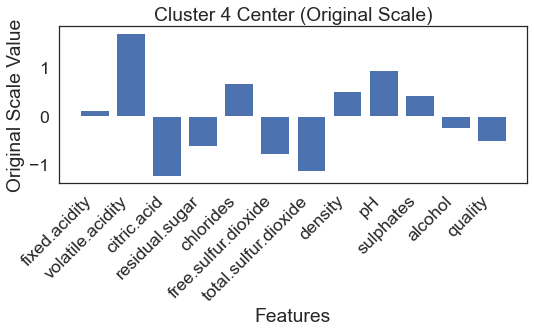

Cluster 5 Center (Original Scale):
fixed.acidity          -0.454856
volatile.acidity       -0.334329
citric.acid             0.032246
residual.sugar         -0.404091
chlorides              -0.575695
free.sulfur.dioxide    -0.014088
total.sulfur.dioxide   -0.088129
density                -1.252110
pH                     -0.098050
sulphates              -0.279773
alcohol                 1.330115
quality                 0.975820
dtype: float64



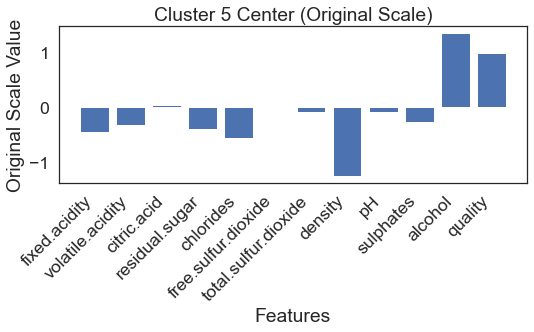

Cluster 6 Center (Original Scale):
fixed.acidity          -0.164098
volatile.acidity       -0.356196
citric.acid             0.314157
residual.sugar          1.465602
chlorides              -0.200084
free.sulfur.dioxide     0.935085
total.sulfur.dioxide    0.997272
density                 0.921065
pH                     -0.503482
sulphates              -0.279623
alcohol                -0.874362
quality                -0.232732
dtype: float64



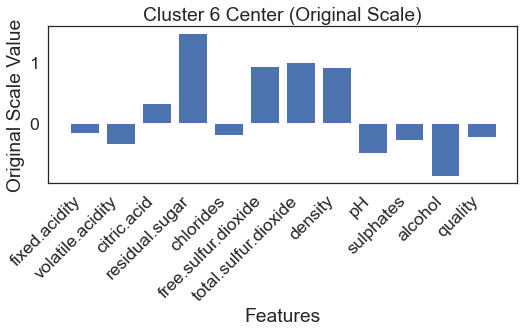

Cluster 7 Center (Original Scale):
fixed.acidity           0.301315
volatile.acidity        0.522864
citric.acid             0.950019
residual.sugar         -0.292568
chlorides               5.431070
free.sulfur.dioxide     0.070943
total.sulfur.dioxide   -0.160807
density                 0.456198
pH                     -0.693819
sulphates               1.110358
alcohol                -0.836612
quality                -0.499386
dtype: float64



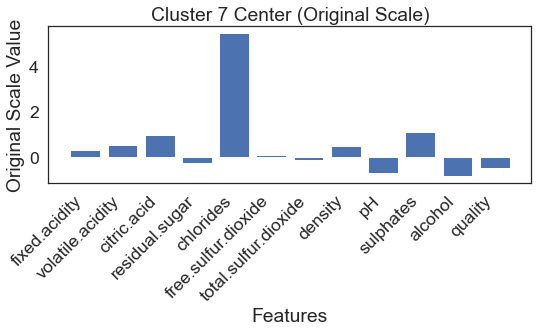

In [153]:
import numpy as np
import matplotlib.pyplot as plt

# Retrieve cluster centers
cluster_centers = kmeans_7.cluster_centers_

# Display cluster centers with numbers and plots
for i, center in enumerate(cluster_centers):
    # Calculate values in original scale
    original_center = center * sigma + mu
    
    print(f"Cluster {i+1} Center (Original Scale):")
    print(original_center)
    print()
    
    # Create a bar plot to visualize cluster center
    plt.figure(figsize=(8, 5))
    plt.bar(range(len(original_center)), original_center, tick_label=X_scaled_df.columns)
    plt.title(f'Cluster {i+1} Center (Original Scale)')
    plt.xlabel('Features')
    plt.ylabel('Original Scale Value')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


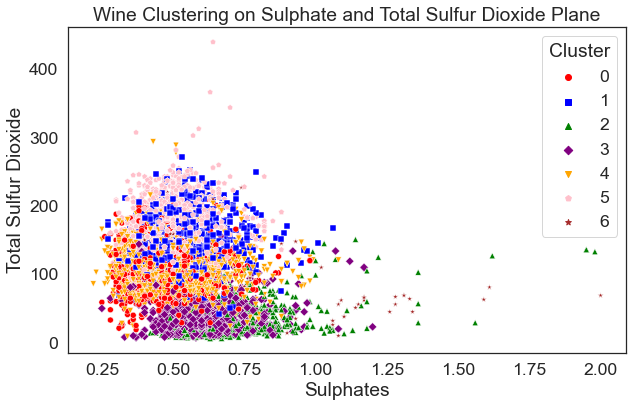

In [147]:
# Retrieve the cluster labels from the KMeans results
cluster_labels = kmeans_7.labels_

# Define a more visible color palette and shape markers
cluster_palette = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange', 5: 'pink', 6: 'brown'}
cluster_markers = {0: 'o', 1: 's', 2: '^', 3: 'D', 4: 'v', 5: 'p', 6: '*'}

# Add the cluster labels to the DataFrame
Wine_data['cluster'] = cluster_labels

# Create a scatter plot with enhanced color palette
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Wine_data, x='sulphates', y='total.sulfur.dioxide', hue='cluster', style='cluster', palette=cluster_palette, markers=cluster_markers)
plt.title('Wine Clustering on Sulphate and Total Sulfur Dioxide Plane')
plt.xlabel('Sulphates')
plt.ylabel('Total Sulfur Dioxide')
plt.legend(title='Cluster')
plt.show()

As it is eveident from the above 1 example of same set of features that we used to check if we can distinguish wine based on colors, quality does not give us distinct clusters.
There is considerable overalp among clusters indicating that we cannot separate wines with different quality levels as effectively as we could do with the colors